In [1]:
!pip install pandas numpy nltk scikit-learn wordcloud matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
df = pd.read_csv("sentiment_analysis.csv")

df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [17]:
df = df[['text', 'sentiment']]  
df.dropna(inplace=True)  
df.reset_index(drop=True, inplace=True)  

In [15]:
df['sentiment'] = df['sentiment'].str.lower()  
df['sentiment'].value_counts()  

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [19]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'#\w+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = word_tokenize(text)  
    text = [word for word in text if word not in stop_words]  
    return ' '.join(text)

df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanxiangzhe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hanxiangzhe/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,sentiment,cleaned_text
0,What a great day!!! Looks like dream.,positive,great day looks like dream
1,"I feel sorry, I miss you here in the sea beach",positive,feel sorry miss sea beach
2,Don't angry me,negative,dont angry
3,We attend in the class just for listening teac...,negative,attend class listening teachers reading slide ...
4,"Those who want to go, let them go",negative,want go let go


/var/folders/1l/6qsy8cfn5j95_0kvfhb2cmtm0000gn/T/ipykernel_49907/827106985.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


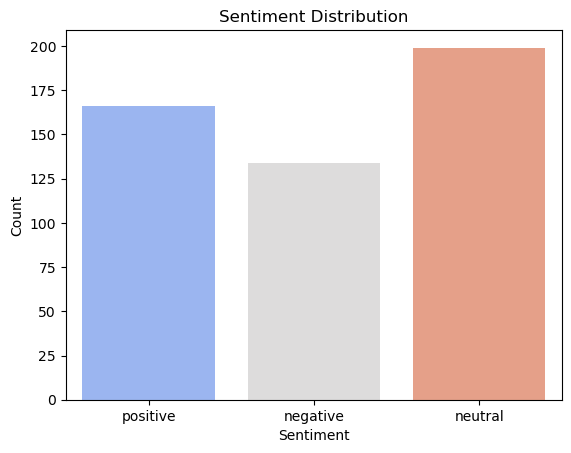

In [21]:
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

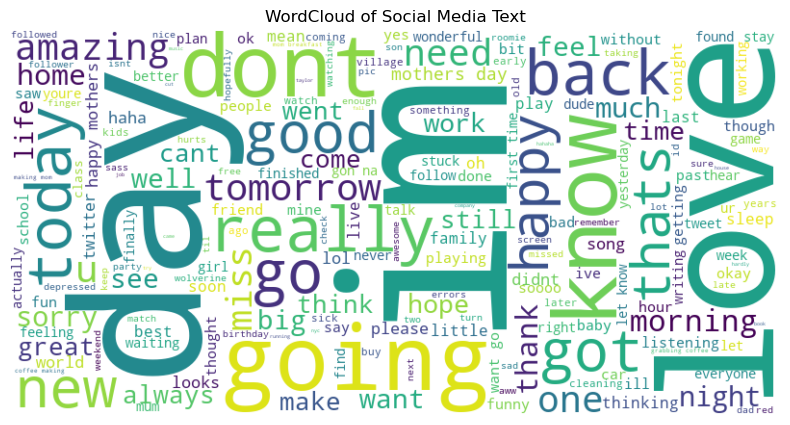

In [23]:
text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Social Media Text")
plt.show()

In [25]:
vectorizer = TfidfVectorizer(max_features=5000)  # 选取 5000 个特征词
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

print("TF-IDF Shape:", X.shape)

TF-IDF Shape: (499, 1297)


In [27]:
label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
y = df['sentiment'].map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The size of the training set:", X_train.shape)
print("The size of the test set:", X_test.shape)

The size of the training set: (399, 1297)
The size of the test set: (100, 1297)


In [ ]:
print("Sample Processed Data:")
print(df[['cleaned_text', 'sentiment']].head())